 # Nick's original code

In [272]:
len(fluxvals)

14

In [154]:
###############################################################################
# get_efficiency.py
###############################################################################
#
# Evaluate the efficiency at the center of each of the bins using the data
# provided by Dan, who was given this by Mattia
#
# Here we have no longitude dependence in the efficiency as that's not public
#
# Written: Nick Rodd, MIT, 5 August 2017
#
###############################################################################

import numpy as np

# All fluxes are in Mev/cm^2/s

# Load the efficiency as specified by Dan
fluxvals = np.array([5.01187234e-07, 7.94328235e-07, 1.25892541e-06,
                    1.99526231e-06, 3.16227766e-06, 5.01187234e-06,
                    7.94328235e-06, 1.25892541e-05, 1.99526231e-05,
                    3.16227766e-05, 5.01187234e-05, 7.94328235e-05,
                    1.25892541e-04, 1.99526231e-04])
bvals = np.array([1., 3., 5., 7.5, 10.5, 14., 18.])

efficiency = np.zeros((len(fluxvals),len(bvals)))

efficiency[:, 0] = [0.00354610, 0.00411523, 0.01162791, 0.00854701, 0.05857741,
                    0.17112299, 0.22916667, 0.28140704, 0.32989691, 0.42405063,
                    0.46601942, 0.60000000, 0.80000000, 1.00000000]
efficiency[:, 1] = [0.00892857, 0.01785714, 0.06493506, 0.15789474, 0.30909091,
                    0.40816327, 0.62162162, 0.76595745, 0.70833333, 0.81159420,
                    0.88636364, 0.90000000, 0.94339623, 1.00000000]
efficiency[:, 2] = [0.01190476, 0.01086957, 0.11627907, 0.38095238, 0.69411765,
                    0.83950617, 0.87671233, 0.90647059, 0.91769231, 0.92444444,
                    0.95444444, 0.97444444, 1.00000000, 1.00000000]
efficiency[:, 3] = [0.00000000, 0.04166667, 0.14782609, 0.39622642, 0.71739130,
                    0.74712644, 0.89189189, 0.85915493, 0.85365854, 0.90058824,
                    0.92647059, 0.95476190, 1.00000000, 1.00000000]
efficiency[:, 4] = [0.00925926, 0.06603774, 0.20408163, 0.50980392, 0.85294118,
                    0.84615385, 0.88505747, 0.92222222, 0.94366197, 0.95522388,
                    0.94339623, 0.95000000, 1.00000000, 1.00000000]
efficiency[:, 5] = [0.00000000, 0.05590062, 0.19298246, 0.52307692, 0.79032258,
                    0.85600000, 0.85964912, 0.90740741, 0.90774194, 0.89156627,
                    0.92461538, 0.89500000, 1.00000000, 1.00000000]
efficiency[:, 6] = [0.02142857, 0.05263158, 0.20833333, 0.55905512, 0.71052632,
                    0.76237624, 0.80357143, 0.87878788, 0.92391304, 0.95555556,
                    0.93750000, 0.95000000, 1.00000000, 1.00000000]

# Load the array of bvals and flux vals for our bins
our_bvals = np.abs([18.33333333, 15., 11.66666667, 8.33333333, 5., 1.66666667,
                    -1.66666667, -5., -8.33333333, -11.66666667, -15., -18.33333333])

# 6 flux bins fro 1e-6 to 1e-5 and 2 from 1e-5 to 1e-4, evaluate midpoints below
fluxvals1 = 10**(1./12.+np.linspace(-6,-5,7)[0:6])
fluxvals2 = 10**(0.25+np.linspace(-5,-4,3)[0:2])
our_fluxvals = np.append(fluxvals1,fluxvals2)

# Find flux interpolation values - this is the integer in fluxvals to go to
our_flux_interp = np.interp(our_fluxvals, fluxvals, np.arange(len(fluxvals), dtype=float))

# Now convert efficiency to be at our fluxes, but original b values
efficiency_ourflux = np.zeros((len(bvals),len(our_fluxvals)))

for i in range(7):
    for j in range(len(our_fluxvals)):
        efficiency_ourflux[i,j] = np.interp(our_flux_interp[j],np.arange(len(fluxvals), dtype=float), efficiency[:,i])

# Find b interpolation values - this is the integer in the bvals to go to
our_b_interp = np.interp(our_bvals, bvals, np.arange(len(bvals), dtype=float))

# Now convert efficiency to our b values and we're done!
our_efficiency = np.zeros((len(our_bvals),len(our_fluxvals)))
for i in range(len(our_bvals)):
    for j in range(len(our_fluxvals)):
        our_efficiency[i,j] = np.interp(our_b_interp[i], np.arange(len(bvals), dtype=float), efficiency_ourflux[:,j])

In [155]:
our_efficiency

array([[ 0.19244879,  0.45570483,  0.63886458,  0.72927794,  0.77097024,
         0.8086025 ,  0.91061561,  0.94010771],
       [ 0.18236033,  0.43328001,  0.6576317 ,  0.79287569,  0.83531351,
         0.84928331,  0.90838642,  0.92385477],
       [ 0.18633152,  0.42174438,  0.68169669,  0.83834933,  0.85510028,
         0.87931009,  0.92744387,  0.93599496],
       [ 0.15171879,  0.3498853 ,  0.60021187,  0.76212881,  0.79869994,
         0.8891025 ,  0.8780743 ,  0.93581742],
       [ 0.1055253 ,  0.30295876,  0.54595769,  0.74669767,  0.84726799,
         0.8787028 ,  0.91438551,  0.95861677],
       [ 0.02728505,  0.04980375,  0.10245829,  0.18116001,  0.27305266,
         0.3655326 ,  0.45217663,  0.62571614],
       [ 0.02728505,  0.04980375,  0.10245829,  0.18116001,  0.27305266,
         0.3655326 ,  0.45217663,  0.62571614],
       [ 0.1055253 ,  0.30295876,  0.54595769,  0.74669767,  0.84726799,
         0.8787028 ,  0.91438551,  0.95861677],
       [ 0.15171879,  0.3498853 

# Integrate over $b$

In [84]:
import numpy as np
from scipy.integrate import nquad, quad
from tqdm import *

# All fluxes are in MeV/cm^2/s

# Load the efficiency as specified by Dan
fluxvals = np.array([5.01187234e-07, 7.94328235e-07, 1.25892541e-06,
                    1.99526231e-06, 3.16227766e-06, 5.01187234e-06,
                    7.94328235e-06, 1.25892541e-05, 1.99526231e-05,
                    3.16227766e-05, 5.01187234e-05, 7.94328235e-05,
                    1.25892541e-04, 1.99526231e-04])

bvals = np.array([1., 3., 5., 7.5, 10.5, 14., 18.])

efficiency = np.zeros((len(fluxvals),len(bvals)))

efficiency[:, 0] = [0.00354610, 0.00411523, 0.01162791, 0.00854701, 0.05857741,
                    0.17112299, 0.22916667, 0.28140704, 0.32989691, 0.42405063,
                    0.46601942, 0.60000000, 0.80000000, 1.00000000]
efficiency[:, 1] = [0.00892857, 0.01785714, 0.06493506, 0.15789474, 0.30909091,
                    0.40816327, 0.62162162, 0.76595745, 0.70833333, 0.81159420,
                    0.88636364, 0.90000000, 0.94339623, 1.00000000]
efficiency[:, 2] = [0.01190476, 0.01086957, 0.11627907, 0.38095238, 0.69411765,
                    0.83950617, 0.87671233, 0.90647059, 0.91769231, 0.92444444,
                    0.95444444, 0.97444444, 1.00000000, 1.00000000]
efficiency[:, 3] = [0.00000000, 0.04166667, 0.14782609, 0.39622642, 0.71739130,
                    0.74712644, 0.89189189, 0.85915493, 0.85365854, 0.90058824,
                    0.92647059, 0.95476190, 1.00000000, 1.00000000]
efficiency[:, 4] = [0.00925926, 0.06603774, 0.20408163, 0.50980392, 0.85294118,
                    0.84615385, 0.88505747, 0.92222222, 0.94366197, 0.95522388,
                    0.94339623, 0.95000000, 1.00000000, 1.00000000]
efficiency[:, 5] = [0.00000000, 0.05590062, 0.19298246, 0.52307692, 0.79032258,
                    0.85600000, 0.85964912, 0.90740741, 0.90774194, 0.89156627,
                    0.92461538, 0.89500000, 1.00000000, 1.00000000]
efficiency[:, 6] = [0.02142857, 0.05263158, 0.20833333, 0.55905512, 0.71052632,
                    0.76237624, 0.80357143, 0.87878788, 0.92391304, 0.95555556,
                    0.93750000, 0.95000000, 1.00000000, 1.00000000]

# Load the array of bvals and flux vals for our bins
our_bvals = np.abs([18.33333333, 15., 11.66666667, 8.33333333, 5., 1.66666667,
                    -1.66666667, -5., -8.33333333, -11.66666667, -15., -18.33333333])


our_bvals = our_bvals#[-6:]
b_edges = np.abs(np.linspace(-20.,20.,13,dtype=np.float))#[6:]

# 6 flux bins from 1e-6 to 1e-5 and 2 from 1e-5 to 1e-4, evaluate midpoints below
fluxvals1 = 10**(1./12.+np.linspace(-6,-5,7)[0:6])
fluxvals2 = 10**(0.25+np.linspace(-5,-4,3)[0:2])
our_fluxvals = np.append(fluxvals1,fluxvals2)

# Now convert efficiency to be at our fluxes, but original b values
efficiency_ourflux = np.zeros((len(bvals),len(our_fluxvals)))

for i in range(7):
    for j in range(len(our_fluxvals)):
        efficiency_ourflux[i,j] = np.interp(our_fluxvals[j], fluxvals, efficiency[:,i])
        
# Find b interpolation values - this is the integer in the bvals to go to
our_b_interp = np.interp(our_bvals, bvals, np.arange(len(bvals), dtype=float))

def step(x):
    return 1 * (x > 0)

# Now convert efficiency to our b values and we're done!
our_efficiency_old = np.zeros((len(our_bvals),len(our_bvals), len(our_fluxvals)))
# for i in tqdm_notebook(range(len(our_bvals))):
for i in range(len(our_bvals)):
    print "on i = ",i
    for j in range(len(our_bvals)):
        for k in range(len(our_fluxvals)): 
            
            # Get measure
            measure = np.abs(quad(lambda l: quad(lambda b: (step(np.abs(l) - 2) + step(np.abs(b) - 2)) >= 1,b_edges[j], b_edges[j+1])[0], b_edges[i],b_edges[i+1])[0])
            
            # Calculate efficiency and divide by measure
            our_efficiency_old[i,j,k] = np.abs(quad(lambda l: quad(lambda b: ((step(np.abs(l) - 2) + step(np.abs(b) - 2)) >= 1)*np.interp(b, bvals, efficiency_ourflux[:,k]),b_edges[j],b_edges[j+1])[0],b_edges[i],b_edges[i+1])[0])/measure  # l range and divide by measure

on i =  0
on i =  1
on i =  2
on i =  3
on i =  4
on i =  5
on i =  6
on i =  7
on i =  8
on i =  9
on i =  10
on i =  11


In [ ]:
# Test measure 

i = 6
j = 10

print b_edges[i],b_edges[i+1]
print b_edges[j],b_edges[j+1]

np.abs(quad(lambda l: quad(lambda b: (step(np.abs(l) - 2) + step(np.abs(b) - 2)) >= 1, b_edges[i],b_edges[i+1])[0], b_edges[j],b_edges[j+1])[0])

In [339]:
our_efficiency[6,:,:]

array([[ 0.19155204,  0.45371151,  0.64053277,  0.73493107,  0.77668964,
         0.81221858,  0.91041746,  0.938663  ],
       [ 0.18279406,  0.43366232,  0.65772349,  0.79215596,  0.8338362 ,
         0.84884976,  0.90900169,  0.9247176 ],
       [ 0.18555112,  0.42060106,  0.67984603,  0.83642994,  0.85416519,
         0.87907243,  0.92609983,  0.93555777],
       [ 0.15224789,  0.35240623,  0.60374547,  0.7671498 ,  0.80428578,
         0.88856924,  0.88338661,  0.93734153],
       [ 0.10131349,  0.27037505,  0.48495619,  0.65990201,  0.75340828,
         0.82898877,  0.86514438,  0.93978267],
       [ 0.03878239,  0.07884346,  0.15133165,  0.24076512,  0.33783695,
         0.4569894 ,  0.54532862,  0.71410756],
       [ 0.03878239,  0.07884346,  0.15133165,  0.24076512,  0.33783695,
         0.4569894 ,  0.54532862,  0.71410756],
       [ 0.10131349,  0.27037505,  0.48495619,  0.65990201,  0.75340828,
         0.82898877,  0.86514438,  0.93978267],
       [ 0.15224789,  0.35240623

In [164]:
our_efficiency

array([[ 0.19155204,  0.45371151,  0.64053277,  0.73493107,  0.77668964,
         0.81221858,  0.91041746,  0.938663  ],
       [ 0.18279406,  0.43366232,  0.65772349,  0.79215596,  0.8338362 ,
         0.84884976,  0.90900169,  0.9247176 ],
       [ 0.18555112,  0.42060106,  0.67984603,  0.83642994,  0.85416519,
         0.87907243,  0.92609983,  0.93555777],
       [ 0.15224789,  0.35240623,  0.60374547,  0.7671498 ,  0.80428578,
         0.88856924,  0.88338661,  0.93734153],
       [ 0.10131349,  0.27037505,  0.48495619,  0.65990201,  0.75340828,
         0.82898877,  0.86514438,  0.93978267],
       [ 0.03094805,  0.05931067,  0.11853838,  0.20088421,  0.29430493,
         0.39416882,  0.48106595,  0.65264377],
       [ 0.03094805,  0.05931067,  0.11853838,  0.20088421,  0.29430493,
         0.39416882,  0.48106595,  0.65264377],
       [ 0.10131349,  0.27037505,  0.48495619,  0.65990201,  0.75340828,
         0.82898877,  0.86514438,  0.93978267],
       [ 0.15224789,  0.35240623

In [341]:
np.save("../data/omega_ijk_intb_masked.npy", our_efficiency)

## Ben's take on this

** Sub-title: maybe I'm messing this up, also sorry for the radio silence here up till now when I start messing things up**

In [68]:
#[1., 3., 5., 7.5, 10.5, 14., 18.]+[1., 3., 5., 7.5, 10.5, 14., 18.]

In [115]:
import numpy as np
from scipy.integrate import nquad, quad

# All fluxes are in MeV/cm^2/s

# Load the efficiency as specified by Dan
fluxvals = np.array([5.01187234e-07, 7.94328235e-07, 1.25892541e-06,
                    1.99526231e-06, 3.16227766e-06, 5.01187234e-06,
                    7.94328235e-06, 1.25892541e-05, 1.99526231e-05,
                    3.16227766e-05, 5.01187234e-05, 7.94328235e-05,
                    1.25892541e-04, 1.99526231e-04])

bvals = np.array([-18., 14., -10.5, -7.5, -5., -3., -1.]+[1., 3., 5., 7.5, 10.5, 14., 18.])

efficiency = np.zeros((len(fluxvals),len(bvals)))

off = 7
efficiency[:, off+0] = [0.00354610, 0.00411523, 0.01162791, 0.00854701, 0.05857741,
                    0.17112299, 0.22916667, 0.28140704, 0.32989691, 0.42405063,
                    0.46601942, 0.60000000, 0.80000000, 1.00000000]
efficiency[:, off+1] = [0.00892857, 0.01785714, 0.06493506, 0.15789474, 0.30909091,
                    0.40816327, 0.62162162, 0.76595745, 0.70833333, 0.81159420,
                    0.88636364, 0.90000000, 0.94339623, 1.00000000]
efficiency[:, off+2] = [0.01190476, 0.01086957, 0.11627907, 0.38095238, 0.69411765,
                    0.83950617, 0.87671233, 0.90647059, 0.91769231, 0.92444444,
                    0.95444444, 0.97444444, 1.00000000, 1.00000000]
efficiency[:, off+3] = [0.00000000, 0.04166667, 0.14782609, 0.39622642, 0.71739130,
                    0.74712644, 0.89189189, 0.85915493, 0.85365854, 0.90058824,
                    0.92647059, 0.95476190, 1.00000000, 1.00000000]
efficiency[:, off+4] = [0.00925926, 0.06603774, 0.20408163, 0.50980392, 0.85294118,
                    0.84615385, 0.88505747, 0.92222222, 0.94366197, 0.95522388,
                    0.94339623, 0.95000000, 1.00000000, 1.00000000]
efficiency[:, off+5] = [0.00000000, 0.05590062, 0.19298246, 0.52307692, 0.79032258,
                    0.85600000, 0.85964912, 0.90740741, 0.90774194, 0.89156627,
                    0.92461538, 0.89500000, 1.00000000, 1.00000000]
efficiency[:, off+6] = [0.02142857, 0.05263158, 0.20833333, 0.55905512, 0.71052632,
                    0.76237624, 0.80357143, 0.87878788, 0.92391304, 0.95555556,
                    0.93750000, 0.95000000, 1.00000000, 1.00000000]
efficiency[:,0] = efficiency[:, off+6]
efficiency[:,1] = efficiency[:, off+5]
efficiency[:,2] = efficiency[:, off+4]
efficiency[:,3] = efficiency[:, off+3]
efficiency[:,4] = efficiency[:, off+2]
efficiency[:,5] = efficiency[:, off+1]
efficiency[:,6] = efficiency[:, off+0]


# Load the array of bvals and flux vals for our bins
our_bvals = np.array([18.33333333, 15., 11.66666667, 8.33333333, 5., 1.66666667,
                    -1.66666667, -5., -8.33333333, -11.66666667, -15., -18.33333333])#np.abs([18.33333333, 15., 11.66666667, 8.33333333, 5., 1.66666667,
                   # -1.66666667, -5., -8.33333333, -11.66666667, -15., -18.33333333])


our_bvals = our_bvals#[-6:]
b_edges = - np.linspace(-20.,20.,13,dtype=np.float)#np.abs(np.linspace(-20.,20.,13,dtype=np.float))#[6:]

# 6 flux bins from 1e-6 to 1e-5 and 2 from 1e-5 to 1e-4, evaluate midpoints below
fluxvals1 = 10**(1./12.+np.linspace(-6,-5,7)[0:6])
fluxvals2 = 10**(0.25+np.linspace(-5,-4,3)[0:2])
our_fluxvals = np.append(fluxvals1,fluxvals2)

# Now convert efficiency to be at our fluxes, but original b values
efficiency_ourflux = np.zeros((len(bvals),len(our_fluxvals)))

for i in range(14):
    for j in range(len(our_fluxvals)):
        efficiency_ourflux[i,j] = np.interp(our_fluxvals[j], fluxvals, efficiency[:,i])
        
# Find b interpolation values - this is the integer in the bvals to go to
our_b_interp = np.interp(our_bvals, bvals, np.arange(len(bvals), dtype=float))

def step(x):
    return 1 * (x > 0)

# Now convert efficiency to our b values and we're done!
our_efficiency = np.zeros((len(our_bvals),len(our_bvals), len(our_fluxvals)))
# for i in tqdm_notebook(range(len(our_bvals))):
for i in range(len(our_bvals)):
    print "on i = ", i
    for j in range(len(our_bvals)):
        for k in range(len(our_fluxvals)): 

            # Get measure
            measure = np.abs(quad(lambda l: quad(lambda b: np.cos(b*np.pi/180.)*step(180./np.pi*np.arccos(np.cos(l*np.pi/180.)*np.cos(b*np.pi/180.))- 2.),b_edges[j], b_edges[j+1])[0], b_edges[i],b_edges[i+1])[0])

            # Calculate efficiency and divide by measure
            our_efficiency[i,j,k] = np.abs(quad(lambda l: quad(lambda b: np.cos(b*np.pi/180.)*step(180./np.pi*np.arccos(np.cos(l*np.pi/180.)*np.cos(b*np.pi/180.))- 2.)*np.interp(b, bvals, efficiency_ourflux[:,k]),b_edges[j],b_edges[j+1])[0],b_edges[i],b_edges[i+1])[0])/measure  # l range and divide by measure

on i =  0
on i =  1
on i =  2
on i =  3
on i =  4
on i =  5
on i =  6
on i =  7
on i =  8
on i =  9
on i =  10
on i =  11


In [ ]:
np.save("../data/omega_ijk_intb_masked_ben.npy", our_efficiency)

In [145]:
np.arccos(np.cos(-2.*np.pi/180.))*180/np.pi

1.9999999999999472

In [47]:
ell = 1.667
b = 1.667
print 180./np.pi*np.arccos(np.cos(ell*np.pi/180.)*np.cos(b*np.pi/180.))
step(180./np.pi*np.arccos(np.cos(ell*np.pi/180.)*np.cos(b*np.pi/180.))- 2)

2.35732768268


1

In [109]:
b = our_bvals[6]
ell = our_bvals[6]
j=0
i=0
k=0
measure = np.abs(quad(lambda l: quad(lambda b: np.cos(b*np.pi/180.)*step(180./np.pi*np.arccos(np.cos(l*np.pi/180.)*np.cos(b*np.pi/180.))- 2.),b_edges[j], b_edges[j+1])[0], b_edges[i],b_edges[i+1])[0])

In [110]:
eff = np.abs(quad(lambda l: quad(lambda b: np.cos(b*np.pi/180.)*step(180./np.pi*np.arccos(np.cos(l*np.pi/180.)*np.cos(b*np.pi/180.))- 2.)*np.interp(b, bvals, efficiency_ourflux[:,k]),b_edges[j],b_edges[j+1])[0],b_edges[i],b_edges[i+1])[0])

In [113]:
np.interp(30.0, bvals, efficiency_ourflux[:,k])

0.1924487890864789

In [105]:
 bvals, efficiency_ourflux[:,k]

(array([-18. ,  14. , -10.5,  -7.5,  -5. ,  -3. ,  -1. ,   1. ,   3. ,
          5. ,   7.5,  10.5,  14. ,  18. ]),
 array([ 0.19244879,  0.1789975 ,  0.18999853,  0.13699581,  0.1055253 ,
         0.06013222,  0.01086147,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ]))

### Compare to old values

In [138]:
our_efficiency[0,0,0]

0.19154578872235373

In [140]:
np.min(our_efficiency/our_efficiency_old)

0.89196892979616471

In [122]:
len(our_efficiency.flatten())

1152

In [26]:
tim_file = np.loadtxt("/Users/bsafdi/Downloads/differences_sidv3_timv4.txt")

/Library/Python/2.7/site-packages/matplotlib-2.0.0b4+2617.ge794622-py2.7-macosx-10.10-intel.egg/matplotlib/cbook.py:128: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the matplotlib toolkit finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(array([ 936.,   96.,   24.,    4.,   20.,    8.,    0.,   44.,    0.,   20.]),
 array([ 0.89196893,  1.54537542,  2.19878192,  2.85218841,  3.50559491,
         4.1590014 ,  4.8124079 ,  5.46581439,  6.11922088,  6.77262738,
         7.42603387]),
 <a list of 10 Patch objects>)

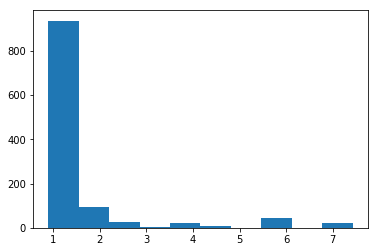

In [136]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
plt.hist( our_efficiency.flatten()/(our_efficiency_old.flatten()*tim_file[::,3]**-1) )

In [42]:
np.max(tim_file[::,3]) #/np.max(our_efficiency/eff_old)

1.05168275967